## Détection des valeurs aberrantes (outliers)

**a. Méthode des boîtes à moustaches (IQR)**

In [230]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

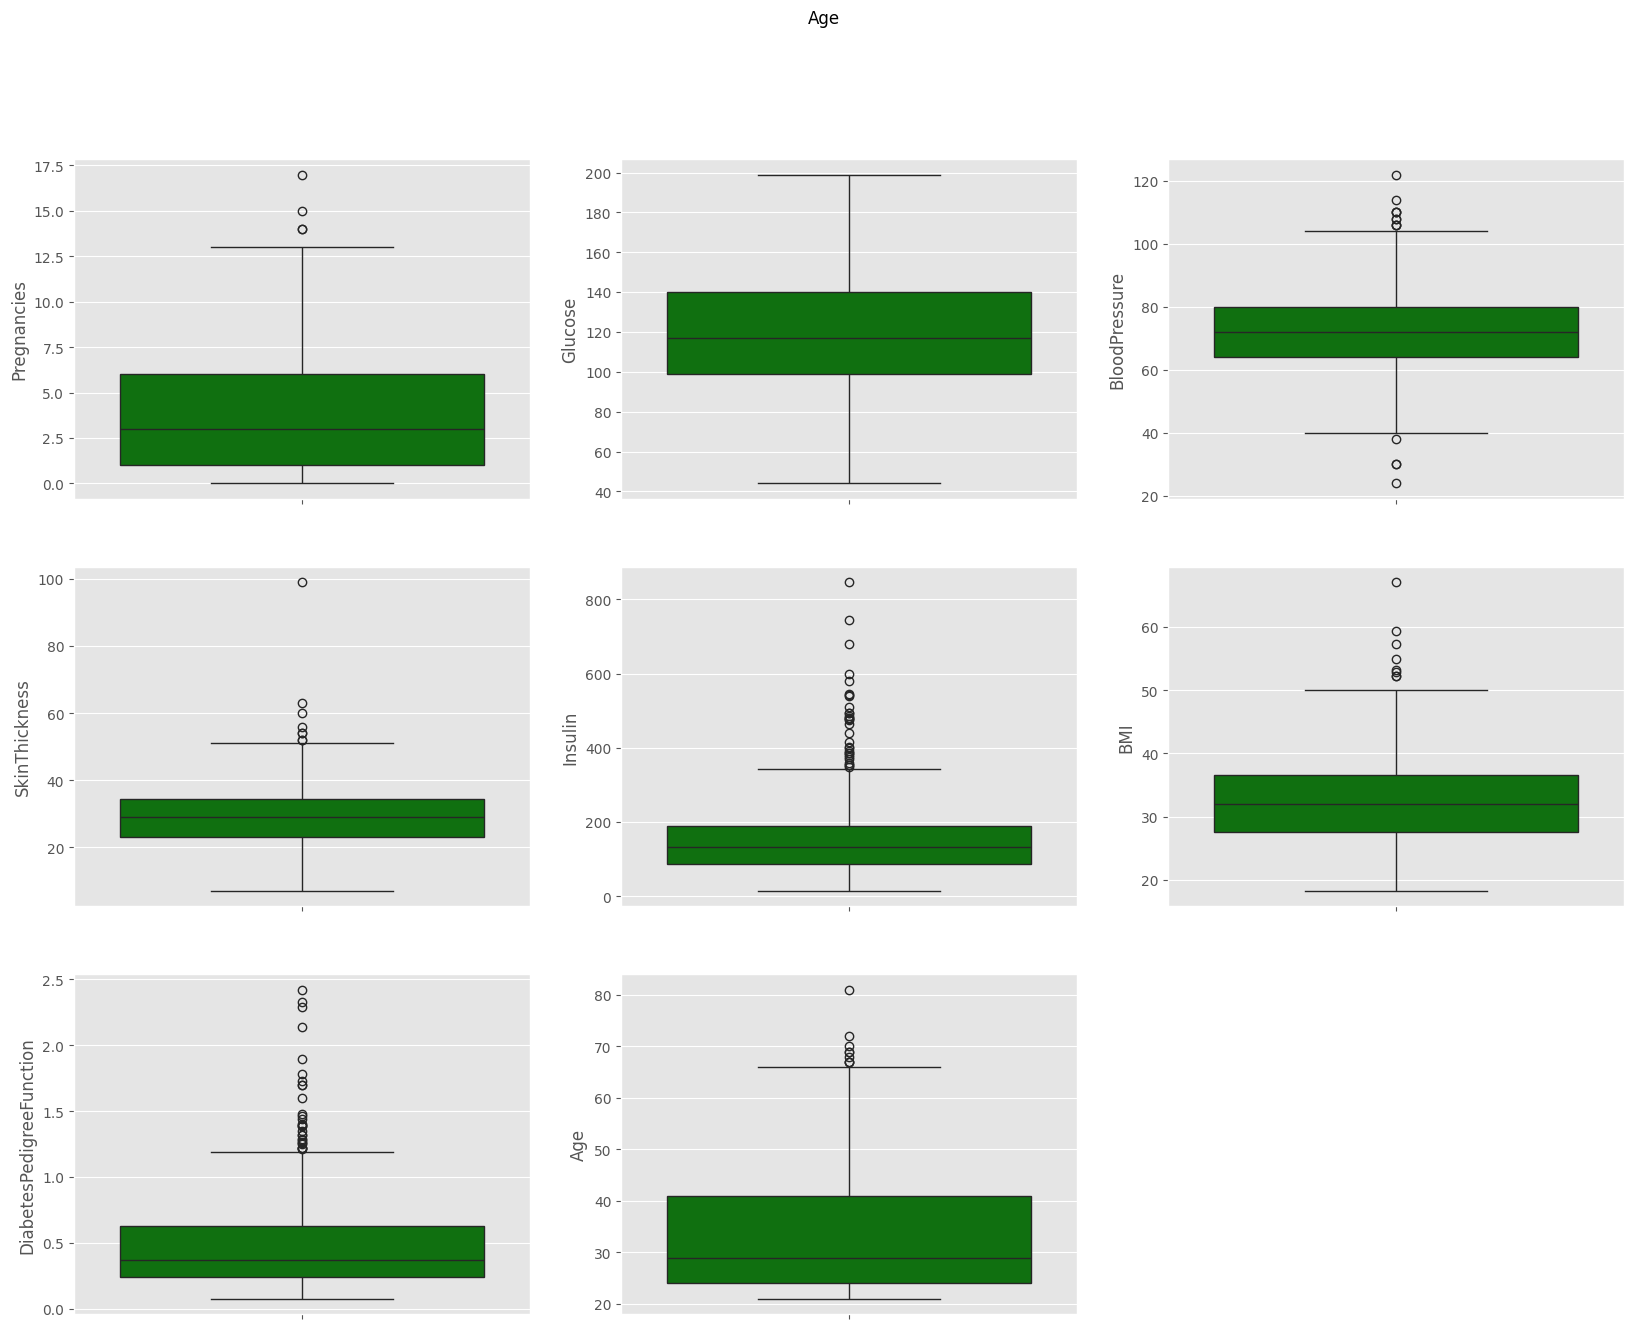

In [231]:
df=pd.read_csv("../data/raw/dataset_diabete_imputed.csv")

plt.figure(figsize=(20,15))
for i ,c in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[c],color="green")
    plt.suptitle(c)
plt.show()



**Remarque :** sauf pour Glucose, toutes les autres colonnes contiennent des outliers.

3.3695780626988694


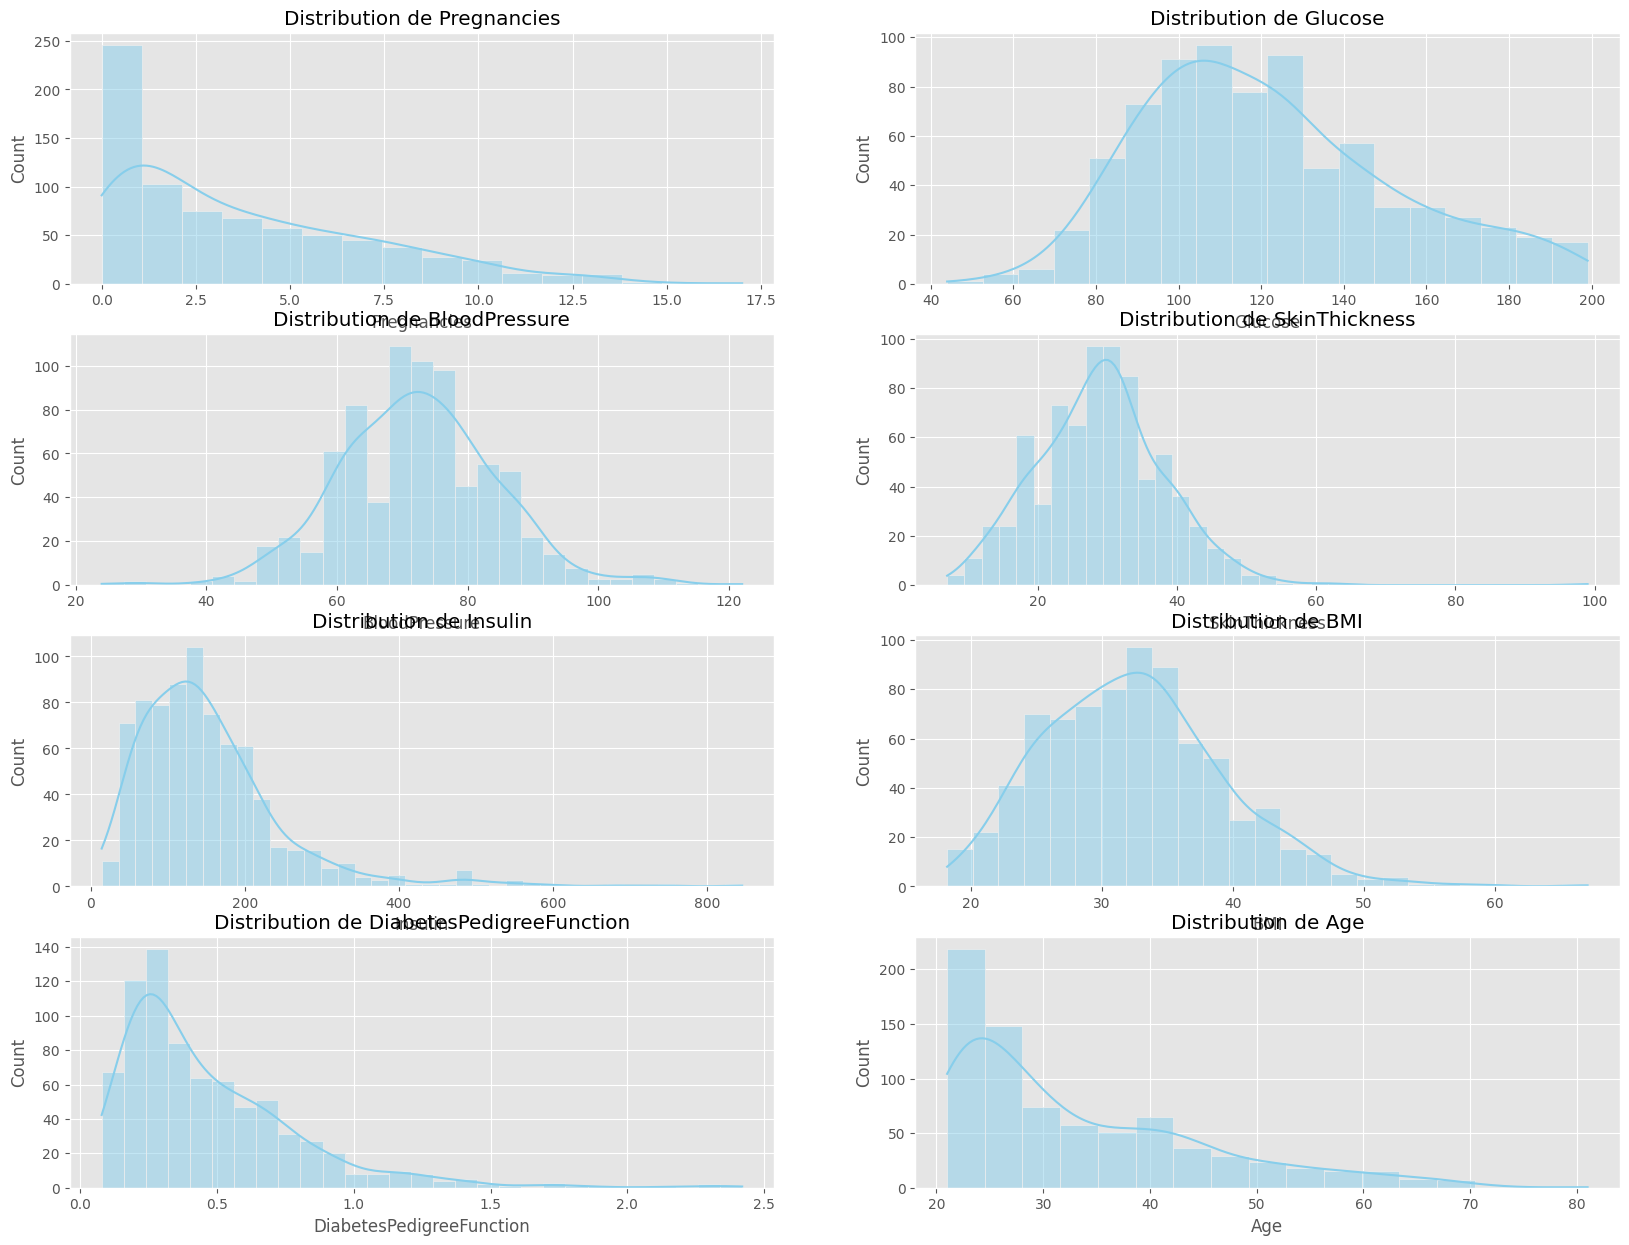

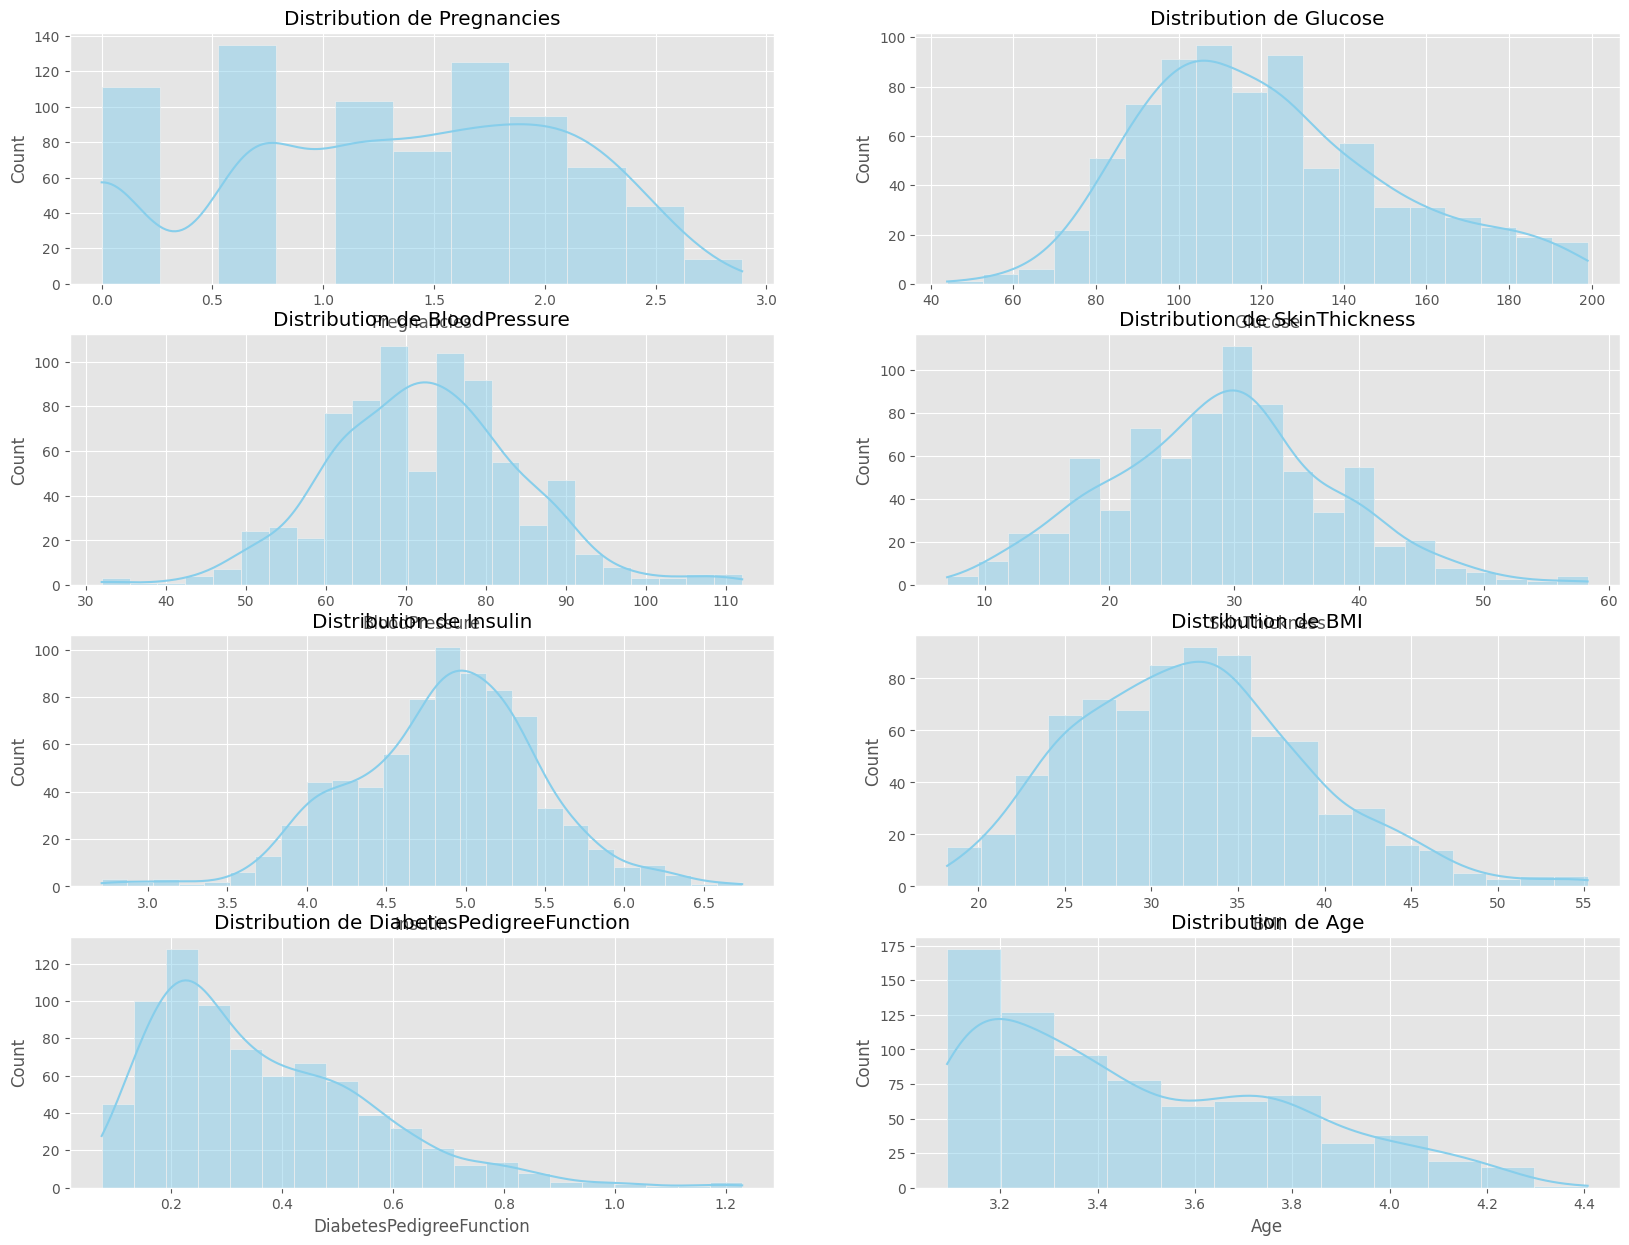

 Transformation logarithmique appliquée sur les variables continues.


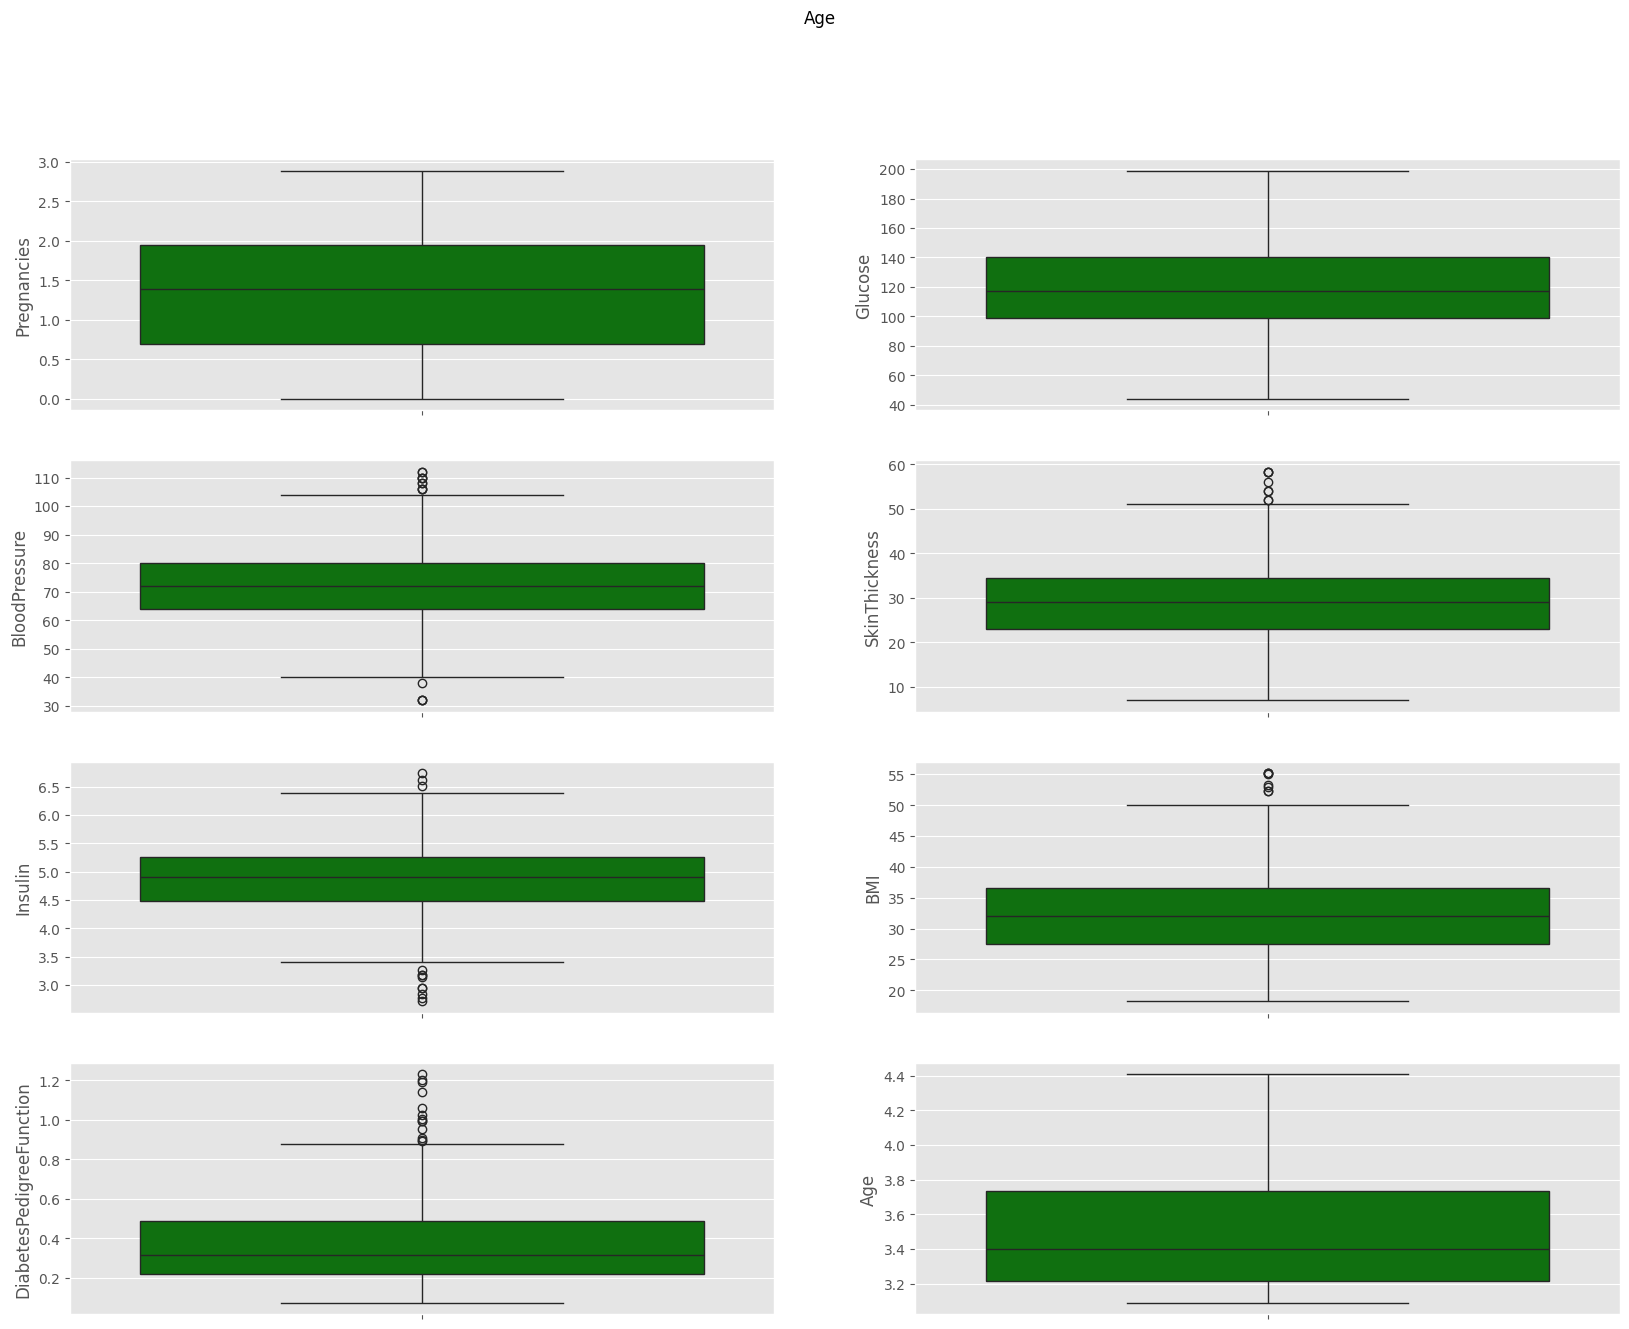

In [232]:
df=pd.read_csv("../data/raw/dataset_diabete_imputed.csv")


print(df["Pregnancies"].std())



plt.figure(figsize=(20,15))

for i, col in enumerate(df.columns, 1):  
    plt.subplot(4, 2, i)  
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution de {col}")
plt.show()

for col in ["DiabetesPedigreeFunction", "Insulin","Pregnancies","Age"]:
    

    df[col] = np.log1p(df[col])  

# print(df)

for col in ["BMI","BloodPressure","SkinThickness"]:

    Q1=df[col].quantile(0.2)
    Q3=df[col].quantile(0.8)
    IQR=Q3-Q1
    borne_max=Q3+1.5*IQR
    borne_min=Q1-1.5*IQR
    # df = df[(df[col] >= borne_min) & (df[col] <= borne_max)]
    
    df[col] = np.where(df[col] > borne_max, borne_max,np.where(df[col] < borne_min, borne_min, df[col]))
 







plt.figure(figsize=(20,15))

for i, col in enumerate(df.columns, 1):  
    plt.subplot(4, 2, i)  
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution de {col}")
plt.show()



print(" Transformation logarithmique appliquée sur les variables continues.")

plt.figure(figsize=(20,15))
for i ,c in enumerate(df.columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[c],color="green")
    plt.suptitle(c)
plt.show()

df.describe(percentiles=[.1, .25, .5, .75, .95])


df.to_csv("../data/processed/diabetes_data_cleaned.csv",index=False)





**Sélectionner les variables présentant la plus grande variabilité**

La variabilité, c’est la mesure de la dispersion des données autour de leur moyenne.
La variabilité permet de :

repérer les variables les plus “dynamiques”, c’est-à-dire celles qui changent beaucoup d’un individu à l’autre,

et donc, qui sont potentiellement les plus utiles pour entraîner un modèle.

In [217]:
df=pd.read_csv("../data/raw/dataset_diabete_imputed.csv")

variabilite = df.std() / df.mean()
variabilite = variabilite.sort_values(ascending=False)
print(variabilite)

Pregnancies                 0.876341
DiabetesPedigreeFunction    0.702151
Insulin                     0.634620
Age                         0.353788
SkinThickness               0.319745
Glucose                     0.250595
BMI                         0.212300
BloodPressure               0.168490
dtype: float64


Interprétation :

La variable Pregnancies a la plus grande variabilité relative.
Cela signifie que le nombre de grossesses varie beaucoup d’un individu à l’autre,
alors que la BloodPressure varie peu.

##  Visualisation des relations entre les variables

Un *pairplot* a été utilisé pour observer les relations entre les variables numériques.  
Il met en évidence les corrélations et la dispersion des données.

```python
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Relations entre les variables du dataset", y=1.02)
plt.show()


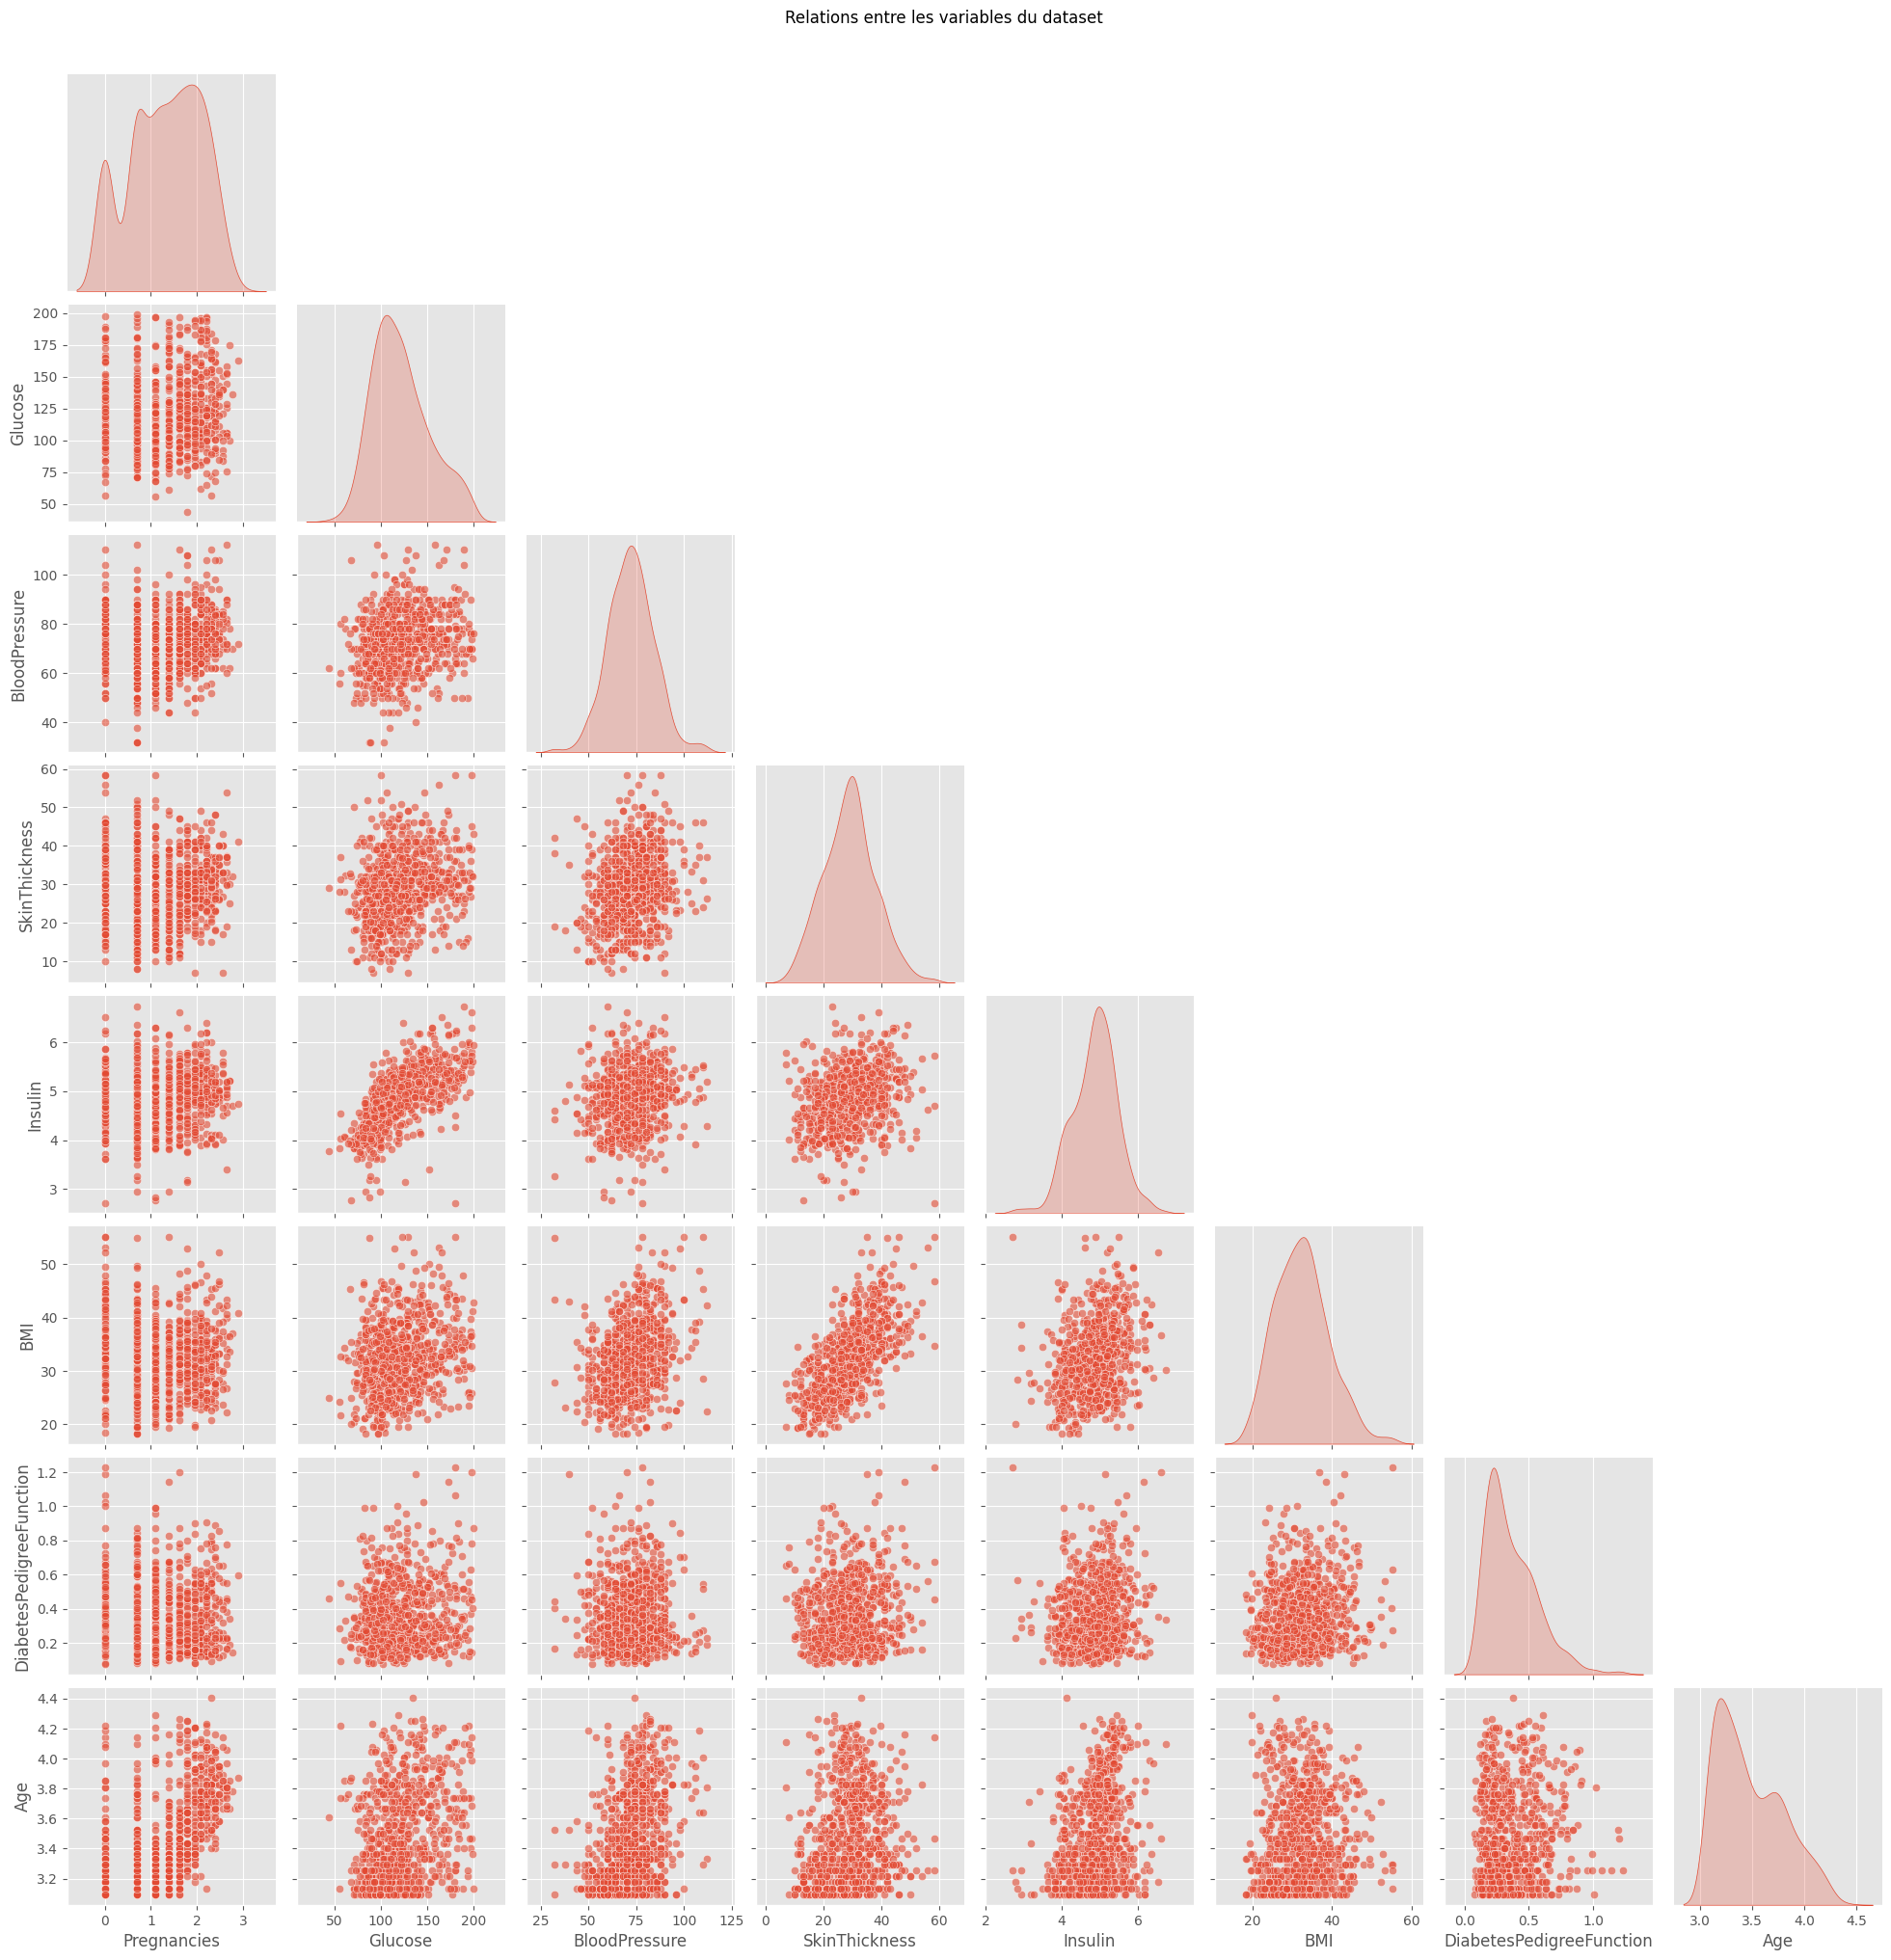

In [166]:
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Relations entre les variables du dataset", y=1.02)
plt.show()

**Appliquation de la technique appropriée pour  standardiser les échelles des variables numériques.**

In [233]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler=StandardScaler()
data_standarad=scaler.fit_transform(df)

df_standard = pd.DataFrame(data_standarad, columns=df.columns)

# df_standard.to_csv("../data/processed/diabetes_data_cleaned_standardized.csv",index=False)
joblib.dump(scaler, "../models/scaler.pkl")

print(df_standard.head(10))
df_standard.mean(), df_standard.std(), df_standard.max()


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.825781  0.866088      -0.029786       0.666679  0.570502  0.175717   
1    -0.802604 -1.202351      -0.526828      -0.001845 -1.363052 -0.855806   
2     1.152449  2.015220      -0.692509      -0.224686  0.476416 -1.342096   
3    -0.802604 -1.071021      -0.526828      -0.670369 -0.525808 -0.634765   
4    -1.703581  0.504932      -2.680676       0.666679  0.446709  1.575641   
5     0.625411 -0.184548       0.135894      -0.781789 -0.444039 -1.003167   
6     0.098373 -1.432177      -1.852273       0.332417 -0.635956 -0.207420   
7     1.413288 -0.217380       0.443587       0.157328  0.029527  0.426230   
8    -0.275566  2.474873      -0.195467       1.780886  2.420456 -0.281100   
9     1.152449  0.110944       1.958381      -0.065514  0.364834  0.443071   

   DiabetesPedigreeFunction       Age  
0                  0.612059  1.437767  
1                 -0.324994 -0.050575  
2                  0.

(Pregnancies                 7.401487e-17
 Glucose                    -1.017704e-16
 BloodPressure               2.347659e-16
 SkinThickness               3.110937e-16
 Insulin                     1.295260e-15
 BMI                        -3.168762e-16
 DiabetesPedigreeFunction   -1.202742e-16
 Age                        -3.469447e-17
 dtype: float64,
 Pregnancies                 1.000652
 Glucose                     1.000652
 BloodPressure               1.000652
 SkinThickness               1.000652
 Insulin                     1.000652
 BMI                         1.000652
 DiabetesPedigreeFunction    1.000652
 Age                         1.000652
 dtype: float64,
 Pregnancies                 2.053426
 Glucose                     2.540538
 BloodPressure               3.283826
 SkinThickness               3.261189
 Insulin                     3.167967
 BMI                         3.358702
 DiabetesPedigreeFunction    4.356900
 Age                         2.954222
 dtype: float64)

##  User Story 2 : Prétraitement des données – Gestion des valeurs manquantes et aberrantes

L’objectif de cette étape était de préparer le jeu de données avant l’entraînement des modèles afin d’assurer la qualité et la fiabilité des analyses.

###  1. Traitement des valeurs manquantes
Une vérification initiale a été réalisée pour identifier les valeurs manquantes. Les colonnes concernées ont été traitées selon leur nature :
- Imputation par la **moyenne** ou la **médiane** pour les variables numériques.
- Suppression des lignes inexploitables lorsque les valeurs manquantes étaient trop nombreuses.

###  2. Détection et gestion des valeurs aberrantes
Les outliers ont été détectés à l’aide de plusieurs techniques statistiques :
- **Boîte à moustaches (boxplot)** pour une visualisation rapide.
- **Z-score** pour identifier les valeurs éloignées de la moyenne.
- **Méthode de l’IQR (Interquartile Range)** pour calculer les bornes acceptables.

Les valeurs extrêmes identifiées ont été soit **corrigées**, soit **supprimées** pour éviter leur impact négatif sur l’analyse.

###  3. Analyse des relations entre variables
Une **matrice de corrélation** et des **visualisations pairplot** ont permis d’examiner les relations entre les variables, afin d’identifier celles ayant la plus grande variabilité et influence sur la cible.

###  4. Normalisation et standardisation
Les variables numériques ont été **standardisées** à l’aide du `StandardScaler` de Scikit-learn afin d’uniformiser les échelles et d’améliorer les performances des modèles d’apprentissage.

---

 **Résultat :**
Le jeu de données a été nettoyé, fiabilisé et mis à l’échelle, prêt pour les étapes de clustering et de classification supervisée.
